In [428]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [439]:
# client.get_historical_klines('BTCUSDT','1s','1 hour ago UTC')

prueba = pd.DataFrame(client.get_historical_klines('BTCUSDT','1m','1 hour ago UTC'))
prueba = recent_data.iloc[:,:6]
prueba.columns = ['Tiempo','Open','High','Low','Close','Volume']
prueba

,Tiempo,Open,High,Low,Close,Volume
0,2024-04-03 09:06:00,66548.39,66556.00,66530.00,66534.81,15.18345
1,2024-04-03 09:07:00,66534.81,66578.95,66520.00,66552.40,27.54717
2,2024-04-03 09:08:00,66552.40,66552.40,66522.38,66522.38,11.72736
3,2024-04-03 09:09:00,66522.39,66522.39,66475.35,66503.99,19.96837
4,2024-04-03 09:10:00,66504.00,66504.00,66419.36,66443.99,48.43740
...,...,...,...,...,...,...
1436,2024-04-04 09:02:00,66290.55,66298.70,66264.94,66298.70,10.34393
1437,2024-04-04 09:03:00,66298.69,66307.99,66298.69,66306.95,7.57013
1438,2024-04-04 09:04:00,66306.95,66327.88,66306.94,66327.87,7.39742
1439,2024-04-04 09:05:00,66327.86,66337.05,66327.86,66337.05,10.28930


C:\Users\tinma\AppData\Local\Temp\ipykernel_43392\3484943195.py:13: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  recent_data['Tiempo'] = recent_data.Tiempo.astype('datetime64')


<function matplotlib.pyplot.show(close=None, block=None)>

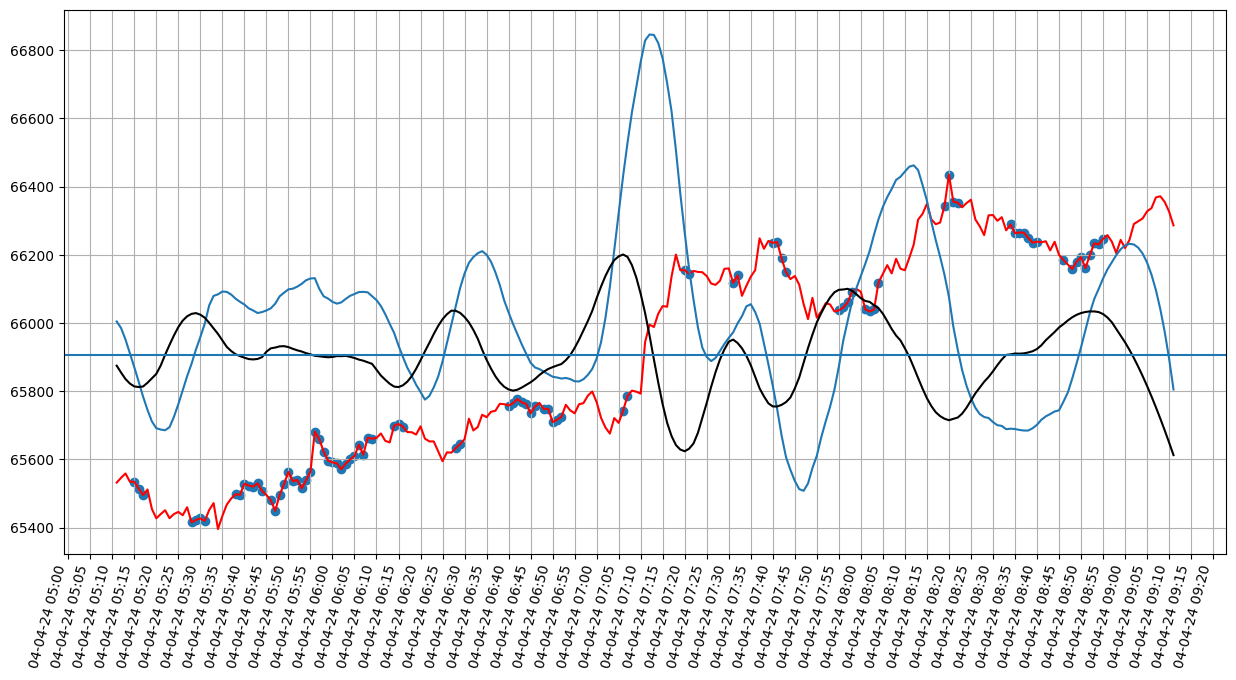

In [442]:
## Conexión con Binance para descargar la lista de pares que binance maneja
from binance import Client
client = Client()


##################################################################################################################################
# Descarga y limpieza de datos de 5 días en adelante
##################################################################################################################################
recent_data = pd.DataFrame(client.get_historical_klines('BTCUSDT','1m','1 day ago UTC'))
recent_data = recent_data.iloc[:,:6]
recent_data.columns = ['Tiempo','Open','High','Low','Close','Volume']
recent_data['Tiempo'] = pd.to_datetime(recent_data.Tiempo,unit='ms')
recent_data['Tiempo'] = recent_data.Tiempo.astype('datetime64')
recent_data = recent_data.set_index('Tiempo')
recent_data = recent_data.astype(float)
recent_data = recent_data.reset_index()
recent_data['Interpolacion'] = sc.signal.savgol_filter(recent_data.Open,25,3)
recent_data['Primer_Derivada'] = recent_data.Interpolacion.diff()
recent_data['PD_Interpolacion'] = sc.signal.savgol_filter(recent_data.Primer_Derivada,25,3)
recent_data['Segunda_Derivada'] = recent_data.PD_Interpolacion.diff()
recent_data['SD_Interpolacion'] = sc.signal.savgol_filter(recent_data.Segunda_Derivada,25,3)
# recent_data


##################################################################################################################################
# Gráfica final del backtesting sobre nuestro análisis con puntos de compra y venta.
##################################################################################################################################
a = 1200
d = 500

min_max_sd = pd.DataFrame(columns=['Derivada'])
min_max_sd['Derivada'] = recent_data[a:a+d].SD_Interpolacion.diff()
lista_min_max = min_max_sd[(min_max_sd['Derivada'] >= -0.1) & (min_max_sd['Derivada'] <= 0.1)]
lista_min_max = lista_min_max.index.tolist()

mp = recent_data.Open[a:a+d].mean()
# plt.axvline(halving_dates['Halving_Dates'][2])
# plt.axvline(halving_dates['Halving_Dates'][3])
plt.figure(figsize=(15,8))
plt.plot(recent_data.Tiempo[a:a+d],recent_data.Open[a:a+d].multiply(1),color='red')
plt.plot(recent_data.Tiempo[a:a+d],recent_data.PD_Interpolacion[a:a+d].multiply(30)+mp)
plt.plot(recent_data.Tiempo[a:a+d],recent_data.SD_Interpolacion[a:a+d].multiply(100)+mp,color='k')
# for i in recent_data.Tiempo.iloc[lista_min_max]:
#     plt.axvline(i)
plt.scatter(recent_data.Tiempo.iloc[lista_min_max],recent_data.Open.iloc[lista_min_max])
plt.grid(visible=True)

# Set minor tick locations.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
# plt.gca().xaxis.set_minor_locator(minorLocator)
plt.gcf().autofmt_xdate()
# Set grid to use minor tick locations. 
plt.grid(which = 'minor')
plt.xticks(rotation=75)
plt.axhline(mp)
# plt.axvline(6500)
plt.show

In [443]:
recent_data

,Tiempo,Open,High,Low,Close,Volume,Interpolacion,Primer_Derivada,PD_Interpolacion,Segunda_Derivada,SD_Interpolacion
0,2024-04-03 09:11:00,66443.99,66474.98,66437.76,66474.97,10.45040,66455.527624,NaN,NaN,NaN,NaN
1,2024-04-03 09:12:00,66474.98,66474.98,66400.01,66457.36,41.43206,66450.029795,-5.497829,NaN,NaN,NaN
2,2024-04-03 09:13:00,66457.36,66486.80,66411.21,66411.21,16.24060,66445.065272,-4.964523,NaN,NaN,NaN
3,2024-04-03 09:14:00,66411.21,66439.09,66411.21,66424.41,16.82832,66440.641115,-4.424157,NaN,NaN,NaN
4,2024-04-03 09:15:00,66424.41,66464.00,66424.40,66443.30,18.75549,66436.764383,-3.876732,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1436,2024-04-04 09:07:00,66368.48,66406.55,66368.48,66372.00,28.70446,66329.461516,5.291474,6.299738,-1.507362,-1.546824
1437,2024-04-04 09:08:00,66372.00,66401.30,66344.40,66355.32,53.01479,66333.238877,3.777361,4.443973,-1.855765,-1.879093
1438,2024-04-04 09:09:00,66355.32,66365.37,66326.80,66326.80,12.72259,66335.321038,2.082160,2.219708,-2.224265,-2.224136
1439,2024-04-04 09:10:00,66326.81,66326.81,66283.60,66286.52,23.41577,66335.526909,0.205872,-0.393156,-2.612864,-2.581185


In [185]:
len(lista_min_max)

242

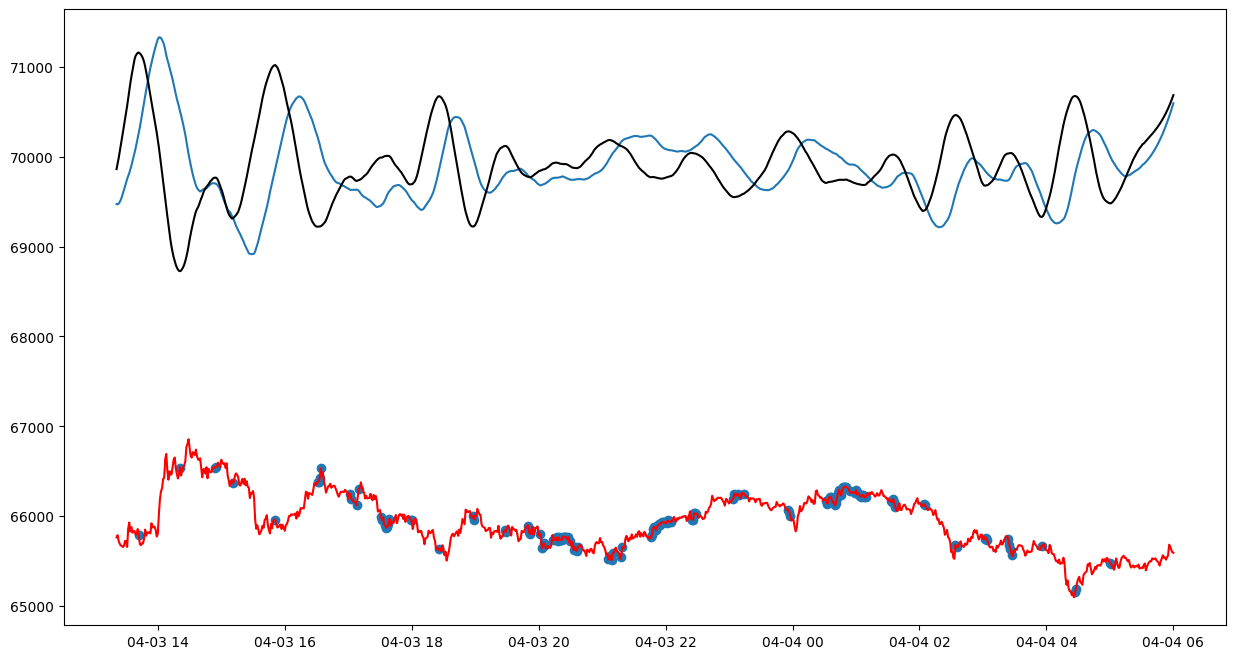

In [186]:
a = 6200
d = 1000
min_max_sd = pd.DataFrame(columns=['Derivada'])
min_max_sd['Derivada'] = recent_data[a:a+d].SD_Interpolacion.diff()
lista_min_max = min_max_sd[(min_max_sd['Derivada'] >= -0.005) & (min_max_sd['Derivada'] <= 0.005)]
lista_min_max = lista_min_max.index.tolist()

plt.figure(figsize=(15,8))
plt.plot(recent_data.Tiempo[a:a+d],recent_data.Open[a:a+d].multiply(1),color='red')
plt.plot(recent_data.Tiempo[a:a+d],recent_data.PD_Interpolacion[a:a+d].multiply(50)+mp)
plt.plot(recent_data.Tiempo[a:a+d],recent_data.SD_Interpolacion[a:a+d].multiply(1000)+mp,color='k')
# for i in recent_data.Tiempo.iloc[lista_min_max]:
#     plt.axvline(i)
plt.scatter(recent_data.Tiempo.iloc[lista_min_max],recent_data.Open.iloc[lista_min_max])

In [6]:
recent_data

,Tiempo,Open,High,Low,Close,Volume,Interpolacion,Primer_Derivada,PD_Interpolacion,Segunda_Derivada,SD_Interpolacion
0,2024-03-30 03:09:00,69997.61,70042.19,69997.61,70032.00,17.52563,70019.352154,NaN,NaN,NaN,NaN
1,2024-03-30 03:10:00,70032.00,70032.01,70022.52,70022.52,6.14836,70010.451336,-8.900818,NaN,NaN,NaN
2,2024-03-30 03:11:00,70022.53,70022.53,70010.01,70022.53,5.56919,70001.823627,-8.627710,NaN,NaN,NaN
3,2024-03-30 03:12:00,70022.53,70022.53,70016.00,70016.00,4.48739,69993.462880,-8.360747,NaN,NaN,NaN
4,2024-03-30 03:13:00,70016.01,70016.01,70010.01,70010.02,3.32384,69985.362952,-8.099928,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7196,2024-04-04 03:05:00,65700.01,65700.01,65649.36,65663.01,18.31143,65720.943444,-9.121613,-9.106245,-2.021561,-2.025844
7197,2024-04-04 03:06:00,65663.00,65672.00,65649.35,65649.36,16.41172,65710.302331,-10.641113,-11.322653,-2.216408,-2.234130
7198,2024-04-04 03:07:00,65649.36,65659.60,65605.50,65659.59,33.84113,65698.061178,-12.241152,-13.740177,-2.417524,-2.450754
7199,2024-04-04 03:08:00,65659.60,65677.41,65640.40,65656.01,9.22107,65684.139448,-13.921730,-16.365083,-2.624906,-2.675804


<function matplotlib.pyplot.show(close=None, block=None)>

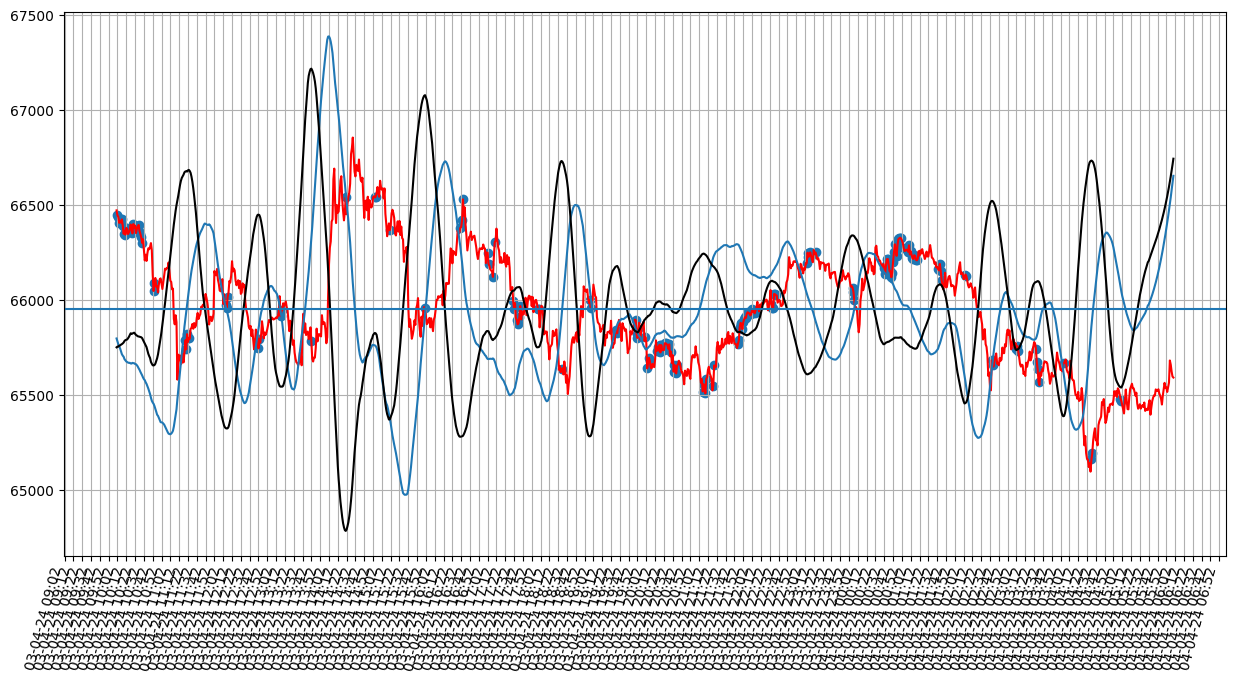

In [179]:
dates = pd.read_csv('../backtesting30_marzo_24_1dia.csv')
dates.Fecha
dates['Fecha'] = dates.Fecha.astype('datetime64')
lista_fecha_trades = dates.Fecha.tolist()
lista_fecha_trades

[Timestamp('2024-03-30 04:43:00'),
 Timestamp('2024-03-30 05:15:00'),
 Timestamp('2024-03-30 06:15:00'),
 Timestamp('2024-03-30 07:38:00'),
 Timestamp('2024-03-30 08:09:00'),
 Timestamp('2024-03-30 08:30:00'),
 Timestamp('2024-03-30 09:00:00'),
 Timestamp('2024-03-30 09:40:00'),
 Timestamp('2024-03-30 10:17:00'),
 Timestamp('2024-03-30 12:10:00'),
 Timestamp('2024-03-30 12:40:00'),
 Timestamp('2024-03-30 13:17:00'),
 Timestamp('2024-03-30 13:48:00'),
 Timestamp('2024-03-30 14:25:00'),
 Timestamp('2024-03-30 14:55:00'),
 Timestamp('2024-03-30 15:20:00'),
 Timestamp('2024-03-30 15:47:00'),
 Timestamp('2024-03-30 16:02:00'),
 Timestamp('2024-03-30 16:35:00'),
 Timestamp('2024-03-30 17:06:00'),
 Timestamp('2024-03-30 18:25:00'),
 Timestamp('2024-03-30 18:53:00'),
 Timestamp('2024-03-30 19:25:00'),
 Timestamp('2024-03-30 19:56:00'),
 Timestamp('2024-03-30 20:26:00'),
 Timestamp('2024-03-30 20:58:00'),
 Timestamp('2024-03-30 21:45:00'),
 Timestamp('2024-03-30 22:35:00'),
 Timestamp('2024-03-

In [180]:
# recent_data.set_index('Tiempo')

list_index = []
for i in lista_fecha_trades:
    a = recent_data.loc[recent_data.Tiempo == i].index.item()
    list_index.append(a)
list_index    

[93,
 125,
 185,
 268,
 299,
 320,
 350,
 390,
 427,
 540,
 570,
 607,
 638,
 675,
 705,
 730,
 757,
 772,
 805,
 836,
 915,
 943,
 975,
 1006,
 1036,
 1068,
 1115,
 1165,
 1205,
 1249,
 1312,
 1365,
 1408]

In [181]:
dates['Precio_USDT'] = recent_data.Open.iloc[list_index].tolist()
dates['Precio_MXN'] = dates['Precio_USDT']*16.7
dates
# recent_data.Open.iloc[list_index]

,Fecha,Accion,Precio_USDT,Precio_MXN
0,2024-03-30 04:43:00,compra,69936.00,1167931.200
1,2024-03-30 05:15:00,venta,70095.90,1170601.530
2,2024-03-30 06:15:00,compra,69957.99,1168298.433
3,2024-03-30 07:38:00,venta,69952.01,1168198.567
4,2024-03-30 08:09:00,compra,69896.99,1167279.733
5,2024-03-30 08:30:00,venta,69940.12,1168000.004
6,2024-03-30 09:00:00,compra,69966.00,1168432.200
7,2024-03-30 09:40:00,venta,70047.41,1169791.747
8,2024-03-30 10:17:00,compra,69963.71,1168393.957
9,2024-03-30 12:10:00,venta,70104.75,1170749.325


In [182]:
dates['Diferencia_Precio_USDT'] = pd.Series()
for i in range(0,32):
    dates['Diferencia_Precio_USDT'][i+1] = (dates.Precio_USDT[i+1] - dates.Precio_USDT[i]) * 0.05
dates

C:\Users\tinma\AppData\Local\Temp\ipykernel_43392\3455326572.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dates['Diferencia_Precio_USDT'] = pd.Series()
C:\Users\tinma\AppData\Local\Temp\ipykernel_43392\3455326572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['Diferencia_Precio_USDT'][i+1] = (dates.Precio_USDT[i+1] - dates.Precio_USDT[i]) * 0.05


,Fecha,Accion,Precio_USDT,Precio_MXN,Diferencia_Precio_USDT
0,2024-03-30 04:43:00,compra,69936.00,1167931.200,NaN
1,2024-03-30 05:15:00,venta,70095.90,1170601.530,7.9950
2,2024-03-30 06:15:00,compra,69957.99,1168298.433,-6.8955
3,2024-03-30 07:38:00,venta,69952.01,1168198.567,-0.2990
4,2024-03-30 08:09:00,compra,69896.99,1167279.733,-2.7510
5,2024-03-30 08:30:00,venta,69940.12,1168000.004,2.1565
6,2024-03-30 09:00:00,compra,69966.00,1168432.200,1.2940
7,2024-03-30 09:40:00,venta,70047.41,1169791.747,4.0705
8,2024-03-30 10:17:00,compra,69963.71,1168393.957,-4.1850
9,2024-03-30 12:10:00,venta,70104.75,1170749.325,7.0520


In [168]:
profits = 0
for i in range(32):
    if dates.Accion[i] == 'compra' and dates.Diferencia_Precio[i+1] > 0:
        profits += dates.Diferencia_Precio[i+1]
    elif dates.Accion[i] == 'compra' and dates.Diferencia_Precio[i+1] < 0:
        profits -= dates.Diferencia_Precio[i+1]
    elif dates.Accion[i] == 'venta' and dates.Diferencia_Precio[i+1] > 0:
        profits -= dates.Diferencia_Precio[i+1]
    elif dates.Accion[i] == 'compra' and dates.Diferencia_Precio[i+1] < 0:
        profits += dates.Diferencia_Precio[i+1]

In [170]:
profits

55.51799999999713

In [92]:
recent_data.Tiempo.iloc[lista_min_max[0:100]][0:50]

C:\Users\tinma\AppData\Local\Temp\ipykernel_43392\2557416121.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  recent_data.Tiempo.iloc[lista_min_max[0:100]][0:50]


61    2024-03-30 04:11:00
62    2024-03-30 04:12:00
63    2024-03-30 04:13:00
64    2024-03-30 04:14:00
65    2024-03-30 04:15:00
66    2024-03-30 04:16:00
67    2024-03-30 04:17:00
68    2024-03-30 04:18:00
69    2024-03-30 04:19:00
70    2024-03-30 04:20:00
71    2024-03-30 04:21:00
80    2024-03-30 04:30:00
84    2024-03-30 04:34:00
85    2024-03-30 04:35:00
116   2024-03-30 05:06:00
117   2024-03-30 05:07:00
147   2024-03-30 05:37:00
148   2024-03-30 05:38:00
149   2024-03-30 05:39:00
150   2024-03-30 05:40:00
151   2024-03-30 05:41:00
152   2024-03-30 05:42:00
153   2024-03-30 05:43:00
154   2024-03-30 05:44:00
155   2024-03-30 05:45:00
156   2024-03-30 05:46:00
177   2024-03-30 06:07:00
178   2024-03-30 06:08:00
180   2024-03-30 06:10:00
181   2024-03-30 06:11:00
182   2024-03-30 06:12:00
183   2024-03-30 06:13:00
184   2024-03-30 06:14:00
185   2024-03-30 06:15:00
186   2024-03-30 06:16:00
187   2024-03-30 06:17:00
188   2024-03-30 06:18:00
189   2024-03-30 06:19:00
190   2024-0

In [77]:
lista_min_max

[79,
 117,
 119,
 120,
 135,
 136,
 219,
 226,
 254,
 255,
 263,
 264,
 265,
 279,
 290,
 291,
 293,
 294,
 312,
 314,
 315,
 327,
 329,
 382,
 515,
 517,
 518,
 519,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 548,
 549,
 557,
 559,
 560,
 561,
 562,
 566,
 567,
 573,
 599,
 600,
 632,
 633,
 702,
 703,
 704,
 705,
 706,
 737,
 768,
 820,
 838,
 898,
 953,
 979,
 1008,
 1039,
 1101,
 1122,
 1131,
 1139,
 1141,
 1142,
 1182,
 1183,
 1184,
 1192,
 1225,
 1226,
 1231,
 1232,
 1234,
 1246,
 1247,
 1248,
 1267,
 1351,
 1352,
 1376,
 1377,
 1378,
 1379,
 1380,
 1383,
 1384,
 1402,
 1403,
 1427,
 1468,
 1469,
 1470,
 1471,
 1513,
 1575,
 1606,
 1607,
 1608,
 1610,
 1712,
 1713,
 1714,
 1715,
 1745,
 1746,
 1780,
 1831,
 1833,
 1899,
 1922,
 1923,
 1924,
 1929,
 1930,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1942,
 1943,
 1944,
 1945,
 1994,
 1996,
 1997,
 1999,
 2000,
 2026,
 2057,
 2088,
 2089,
 2169,
 2203,
 2305,
 2339,
 2353,
 2385,
 2520,
 2593,
 2625,
 2661,
 2704,
 2708,
 2750

In [56]:
min_max_sd.describe()

,Derivada
count,7140.000000
mean,0.000199
std,0.030478
min,-0.187417
25%,-0.013597
50%,0.000675
75%,0.013770
max,0.243231


In [60]:
recent_data

,Tiempo,Open,High,Low,Close,Volume,Interpolacion,Primer_Derivada,PD_Interpolacion,Segunda_Derivada,SD_Interpolacion,Fourier_Freq
0,2024-03-30 03:10:00,70032.00,70032.01,70022.52,70022.52,6.14836,70011.759809,NaN,NaN,NaN,NaN,NaN
1,2024-03-30 03:11:00,70022.53,70022.53,70010.01,70022.53,5.56919,70003.556138,-8.203671,NaN,NaN,NaN,NaN
2,2024-03-30 03:12:00,70022.53,70022.53,70016.00,70016.00,4.48739,69995.548042,-8.008096,NaN,NaN,NaN,NaN
3,2024-03-30 03:13:00,70016.01,70016.01,70010.01,70010.02,3.32384,69987.732909,-7.815133,NaN,NaN,NaN,NaN
4,2024-03-30 03:14:00,70010.01,70010.02,70000.00,70000.01,4.02486,69980.108126,-7.624783,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7196,2024-04-04 03:06:00,65663.00,65672.00,65649.35,65649.36,16.41172,65703.876251,-12.661587,-12.646324,-2.353363,-2.357532,NaN
7197,2024-04-04 03:07:00,65649.36,65659.60,65605.50,65659.59,33.84113,65689.372217,-14.504034,-15.208666,-2.562342,-2.577402,NaN
7198,2024-04-04 03:08:00,65659.60,65677.41,65640.40,65656.01,9.22107,65672.934847,-16.437370,-17.986443,-2.777777,-2.805373,NaN
7199,2024-04-04 03:09:00,65656.00,65672.00,65610.00,65610.01,27.16173,65654.473251,-18.461596,-20.986113,-2.999669,-3.041514,NaN


In [71]:
recent_data.SD_Interpolacion[60:]

60      0.156479
61      0.156814
62      0.158008
63      0.159624
64      0.162194
          ...   
7196   -2.357532
7197   -2.577402
7198   -2.805373
7199   -3.041514
7200   -3.285893
Name: SD_Interpolacion, Length: 7141, dtype: float64

In [72]:
sc.fft.fft(recent_data.SD_Interpolacion[60:].to_numpy())

array([-25.29520945-0.j        , -23.57309437+3.46586061j,
       -29.58988068-5.24046574j, ..., -22.39140888+4.31499239j,
       -29.58988068+5.24046574j, -23.57309437-3.46586061j])

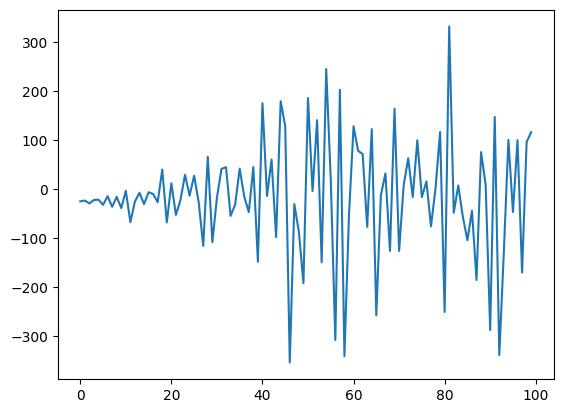

In [83]:
# from .fft import fft, fftfreq

yf = sc.fft.fft(recent_data.SD_Interpolacion[60:].to_numpy())

plt.plot(yf[:100])
